hi.

in this chapter we learn about supervised learning more.

for solving regression problem we have 3 ways.

-------------------

# dataset

In [20]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

* as we can see in this data set , there is no "target_names". because our target is numebrs.

In [22]:
data.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [23]:
import pandas as pd
dataframe = pd.DataFrame(data.data , columns = data.feature_names)
dataframe[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


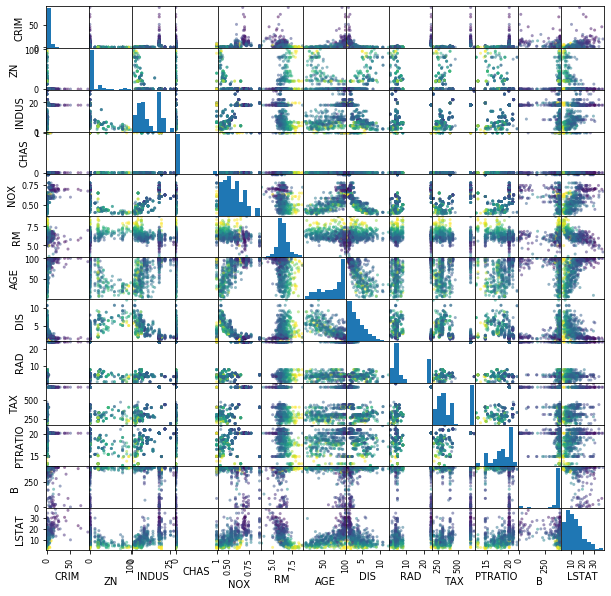

In [64]:
pd.plotting.scatter_matrix(dataframe, c=data.target, figsize=(10 , 10));

In [110]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , data.target , test_size = 0.2)

* now get back on solutions and models

-------------

# 1.Linear Regression

in this models we get data to function and it get answer back to us. 

the function looks like this: f(x[0],x[1],x[2],...) = x[0] * w[0] + x[1] * w[1] + ... + x[n] * w[n]+b

and we call w[i] coefficients

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train , y_train)
print("test accuracy : {:.2f}".format(model.score(x_train ,y_train)))
print("test accuracy : {:.2f}".format(model.score(x_test ,y_test)))

test accuracy : 0.75
test accuracy : 0.69


In [55]:
for n in range(model.coef_.size):
    print("W[{:d}] : {:.2f}".format(n , model.coef_[n]))

W[0] : -0.12
W[1] : 0.05
W[2] : -0.00
W[3] : 1.82
W[4] : -15.52
W[5] : 4.08
W[6] : -0.01
W[7] : -1.52
W[8] : 0.29
W[9] : -0.01
W[10] : -0.92
W[11] : 0.01
W[12] : -0.49


In [58]:
print("and there is intercept parameter: \n b = {:.2f}".format(model.intercept_))

and there is intercept parameter: 
 b = 32.55


----------------------------------

# 2.Ridge

In [66]:
from sklearn.linear_model import Ridge
model = Ridge().fit(x_train ,y_train);
print("test accuracy : {:.2f}".format(model.score(x_train ,y_train)))
print("test accuracy : {:.2f}".format(model.score(x_test ,y_test)))

test accuracy : 0.75
test accuracy : 0.68



when there are many features it cause overfitting and parameters set large.

with "alpha" we can have a trade-off between underfitting and overfitting.

* if alpha set too big Ridge result in a horizontal line and all parameters get closer to zero.
* if alpha set too small , there is no different between Ridge result and linear regression

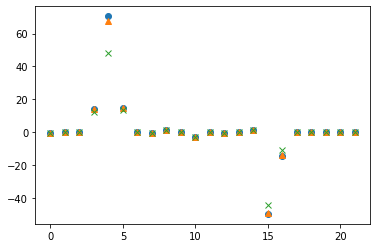

In [108]:
import matplotlib.pyplot as plt
alpha0001 = Ridge(alpha = 0.0001).fit(x_train ,y_train);
alpha001 = Ridge(alpha = .001).fit(x_train ,y_train);
alpha01 = Ridge(alpha = .01).fit(x_train ,y_train);
plt.plot(alpha0001.coef_ , "o");
plt.plot(alpha001.coef_ , "^");
plt.plot(alpha01.coef_ , "x");


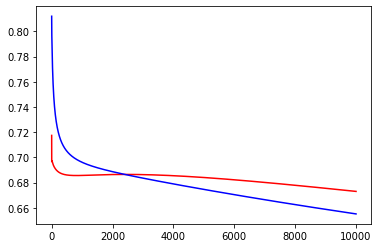

In [117]:
import numpy as np
alphs = np.arange(0 , 10000 , 1)
test_accuracy = []
train_accuracy = []
for n in alphs:
    model = Ridge(alpha = n).fit(x_train ,y_train);
    test_accuracy.append(model.score(x_test , y_test));
    train_accuracy.append(model.score(x_train , y_train));
plt.plot(test_accuracy , c = 'r');
plt.plot(train_accuracy , c = 'b');

-----------------------------

# 3.Lasso

its just like Ridge but some parameter in lasso assign axactly to 0.

In [120]:
from sklearn.linear_model import Lasso
model = Lasso().fit(x_train , y_train)
print("test accuracy : {:.2f}".format(model.score(x_train ,y_train)))
print("test accuracy : {:.2f}".format(model.score(x_test ,y_test)))

test accuracy : 0.68
test accuracy : 0.69


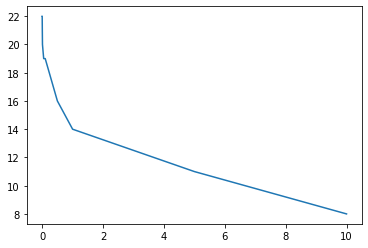

In [140]:
iters = [0.0001 , 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1 , 5 , 10]
tst = [];
for i in iters:
        model = Lasso(alpha = i , max_iter = 100000).fit(x_train , y_train);
        tst.append(np.sum(model.coef_ != 0))

plt.plot(iters , tst);

# Good Luck
---------------------------

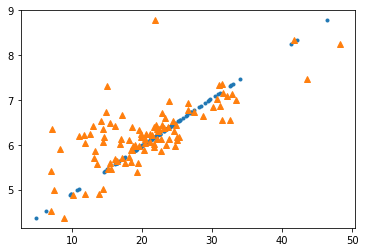

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
data = load_boston();
x_train , x_test , y_train ,y_test = train_test_split(data.data[:,5], data.target , test_size = 0.2)
x_train = x_train.reshape(x_train.shape[0] , 1)
x_test = x_test.reshape(x_test.shape[0] , 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train , y_train)
pred = model.predict(x_test);

plt.plot(pred ,x_test, '.');
plt.plot(y_test ,x_test, '^');